# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# загрузка датасета
import kagglehub

path = kagglehub.dataset_download("antonkozyriev/game-recommendations-on-steam")

print("Путь:", path)

Путь: C:\Users\User\.cache\kagglehub\datasets\antonkozyriev\game-recommendations-on-steam\versions\28


In [4]:
os.listdir(path) # папки с данными

['games.csv', 'games_metadata.json', 'recommendations.csv', 'users.csv']

## Датасет с играми

In [5]:
data_games = pd.read_csv(path + '\\games.csv') # 
data_games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [6]:
data_games.shape

(50872, 13)

Всего 50872 игр

In [7]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [8]:
data_games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


25% игр продаются менее чем за 1 доллар, 50% менее чем за 5 долларов.

У игр большое отклонение, 50% игр имеют менее 50 отзывов, 75% игр менее 200.


In [9]:
data_games.isna().sum() # проверка на пропуски

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

Пропусков не обнаружено

In [10]:
duplicates = data_games.duplicated() # проверка на дубликаты
duplicates.sum()

0

Дубликатов не обнаружено

In [44]:
free_games = len(data_games[data_games['price_original'] == 0]) # Кол-во бесплатных игр
free_games

10090

In [45]:
paid_games = len(data_games[data_games['price_original'] != 0]) # Кол-во платных игр
paid_games

40782

In [68]:
win_games = len(data_games[data_games['win'] == True]) # Кол-во игр на windows
mac_games = len(data_games[data_games['mac'] == True]) # Кол-во игр на mac
linux_games = len(data_games[data_games['linux'] == True]) # Кол-во игр на linux
steam_deck_games = len(data_games[data_games['steam_deck'] == True]) # Кол-во игр на steam deck

all_platform_games = len(data_games[(data_games['linux'] == True) # Кол-во игр на всех платформах
                         & (data_games['win'] == True) 
                         & (data_games['mac'] == True)
                         & (data_games['steam_deck'] == True)])

zero_platform_games = len(data_games[(data_games['linux'] == False) # Кол-во игр не поддерживающих ни одну плафторму
                         & (data_games['win'] == False) 
                         & (data_games['mac'] == False)
                         & (data_games['steam_deck'] == False)])

steam_deck_exclusive_games = len(data_games[(data_games['linux'] == False) # Кол-во игр, которые есть исключительно на steam deck
                         & (data_games['win'] == False) 
                         & (data_games['mac'] == False)
                         & (data_games['steam_deck'] == True)])

print(f"Кол-во игр на windows: {win_games}\nКол-во игр на mac: {mac_games}\nКол-во игр на linux: {linux_games}\n"
f"Кол-во игр на steam deck: {steam_deck_games}")

print(f"\nКол-во игр поддерживающих все платформы: {all_platform_games}")

print(f"\nКол-во игр не поддерживающих ни одну плафторму: {zero_platform_games}")

print(f"\nКол-во игр эксклюзивных для steam deck: {steam_deck_exclusive_games}")

Кол-во игр на windows: 50076
Кол-во игр на mac: 13018
Кол-во игр на linux: 9041
Кол-во игр на steam deck: 50870

Кол-во игр поддерживающих все платформы: 7653

Кол-во игр не поддерживающих ни одну плафторму: 0

Кол-во игр эксклюзивных для steam deck: 792


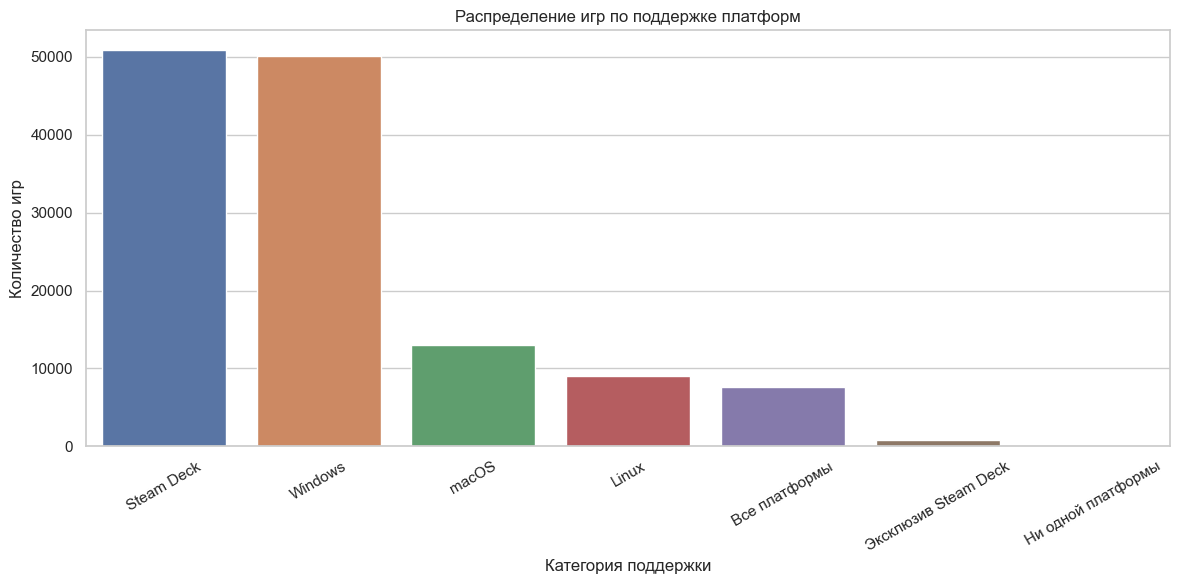

In [72]:
stats = pd.DataFrame({
    "Категория": [
        "Windows",
        "macOS",
        "Linux",
        "Steam Deck",
        "Все платформы",
        "Ни одной платформы",
        "Эксклюзив Steam Deck"
    ],
    "Количество игр": [
        win_games,
        mac_games,
        linux_games,
        steam_deck_games,
        all_platform_games,
        zero_platform_games,
        steam_deck_exclusive_games
    ]
})

stats = stats.sort_values("Количество игр", ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=stats,
    x="Категория",
    y="Количество игр",
    hue = 'Категория',
    dodge=False
)

plt.title("Распределение игр по поддержке платформ")
plt.xlabel("Категория поддержки")
plt.ylabel("Количество игр")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

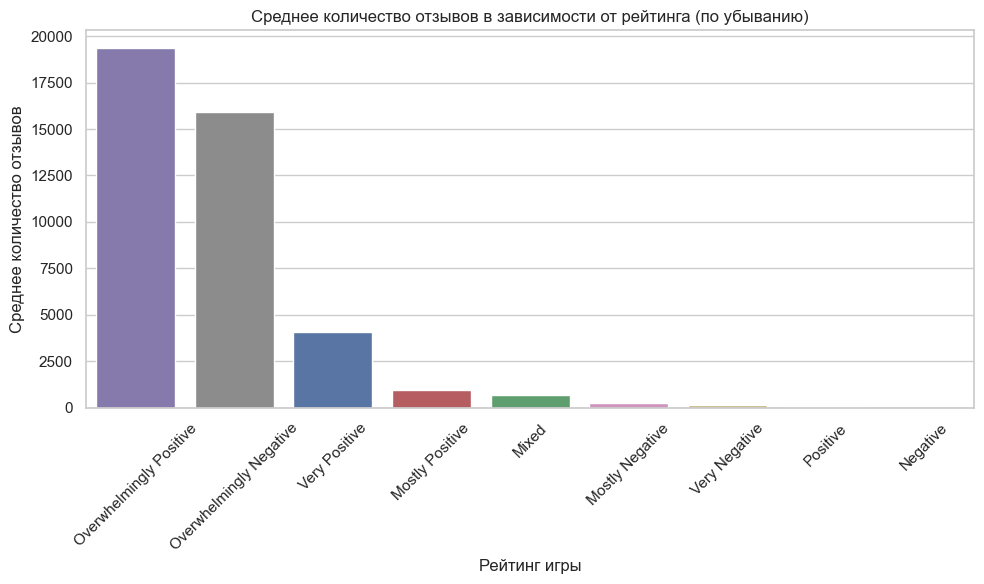

In [56]:
sns.color_palette("Spectral", as_cmap=True)

rating_order = (
    data_games
    .groupby("rating", as_index=False)["user_reviews"]
    .mean()
    .sort_values("user_reviews", ascending=False)["rating"]
)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=data_games,
    x="rating",
    y="user_reviews",
    estimator=np.mean,
    errorbar=None,
    order=rating_order,
    hue='rating',
    ax=ax
)

ax.set_xlabel("Рейтинг игры")
ax.set_ylabel("Среднее количество отзывов")
ax.set_title("Среднее количество отзывов в зависимости от рейтинга (по убыванию)")

ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## Датасет с пользователями

In [3]:
users = pd.read_csv(path + '\\users.csv')
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [4]:
users.shape

(14306064, 3)

In [5]:
users.describe()

,user_id,products,reviews
count,1.430606e+07,1.430606e+07,1.430606e+07
mean,7.153032e+06,1.163734e+02,2.876738e+00
std,4.129805e+06,2.438515e+02,7.987421e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.576516e+06,2.300000e+01,1.000000e+00
50%,7.153032e+06,5.500000e+01,1.000000e+00
75%,1.072955e+07,1.270000e+02,3.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 327.4 MB


In [6]:
print('Кол-во пропусков')
users.isna().sum()

Кол-во пропусков


user_id     0
products    0
reviews     0
dtype: int64

In [8]:
duplicates = users.duplicated() # проверка на дубликаты
print('Полностью дублированных строк:')
duplicates.sum()

Полностью дублированных строк:


0

In [10]:
print(f'Кол-во пользователей: {users['user_id'].count()}')

Кол-во пользователей: 14306064


In [9]:
zero_games_users = users[users['products'] == 0]
one_games_users = users[users['products'] == 1]
two_games_users = users[users['products'] == 2]

three_to_ten_games_users = users[(users['products'] <= 10) & (users['products'] > 2)]
eleven_to_50_games_users = users[(users['products'] <= 50) & (users['products'] > 10)]
fiftyone_to_100_games_users = users[(users['products'] <= 100) & (users['products'] > 50)]
onehundred_plus_games_users = users[users['products'] > 100]

print(f'Кол-во пользователей с 0 игр, в библиотеке: {len(zero_games_users)}')
print(f'Кол-во пользователей с 1 игрой, в библиотеке: {len(one_games_users)}')
print(f'Кол-во пользователей с 2 играми, в библиотеке: {len(two_games_users)}')
print(f'Кол-во пользователей у которых от 3 до 10 игр в библиотеке: {len(three_to_ten_games_users)}')
print(f'Кол-во пользователей у которых от 11 до 50 игр в библиотеке: {len(eleven_to_50_games_users)}')
print(f'Кол-во пользователей у которых от 50 до 100 игр в библиотеке: {len(fiftyone_to_100_games_users)}')
print(f'Кол-во пользователей у которых более 100 игр в библиотеке: {len(onehundred_plus_games_users)}')

Кол-во пользователей с 0 игр, в библиотеке: 139318
Кол-во пользователей с 1 игрой, в библиотеке: 0
Кол-во пользователей с 2 играми, в библиотеке: 159174
Кол-во пользователей у которых от 3 до 10 игр в библиотеке: 1352080
Кол-во пользователей у которых от 11 до 50 игр в библиотеке: 5078003
Кол-во пользователей у которых от 50 до 100 игр в библиотеке: 3062706
Кол-во пользователей у которых более 100 игр в библиотеке: 4514783


In [10]:
df = pd.DataFrame({
    'Категория': ['0 игр', '1 игра', '2 игры', '3-10 игр', '11-50 игр', '51-100 игр', '>100 игр'],
    'Количество игроков': [
        len(zero_games_users),
        len(one_games_users), 
        len(two_games_users),
        len(three_to_ten_games_users),
        len(eleven_to_50_games_users),
        len(fiftyone_to_100_games_users),
        len(onehundred_plus_games_users)
    ]
})
df

,Категория,Количество игроков
0,0 игр,139318
1,1 игра,0
2,2 игры,159174
3,3-10 игр,1352080
4,11-50 игр,5078003
5,51-100 игр,3062706
6,>100 игр,4514783


<Figure size 1000x700 with 0 Axes>

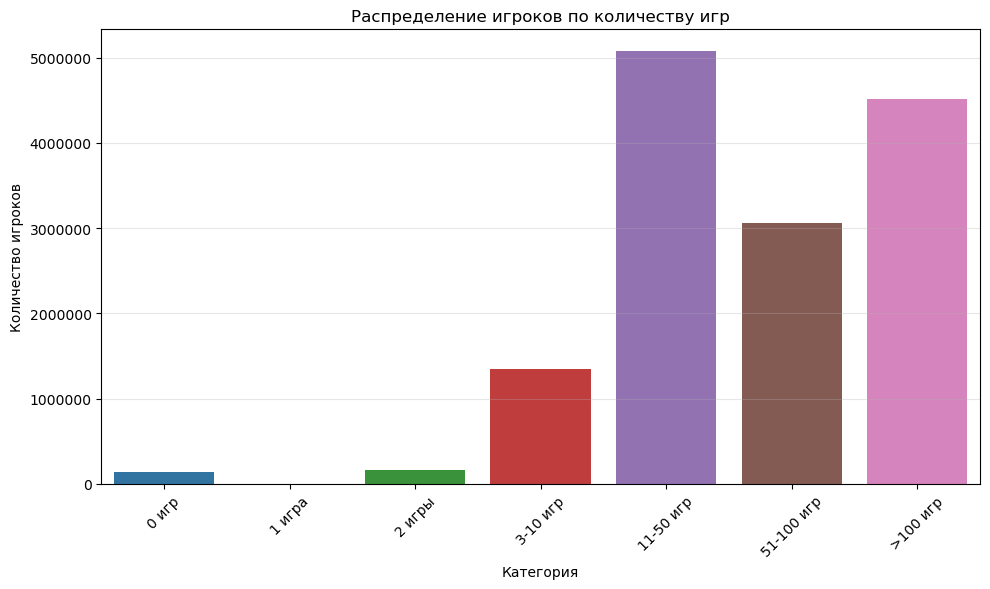

In [18]:
fig = plt.figure(figsize = (10, 7))
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Категория', y='Количество игроков', hue='Категория')
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.3)
plt.title('Распределение игроков по количеству игр')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
zero_review_users = users[users['reviews'] == 0]
one_review_users = users[users['reviews'] == 1]
two_review_users = users[users['reviews'] == 2]
three_to_ten_reviews_users = users[(users['reviews'] <= 10) & (users['reviews'] > 2)]
eleven_to_50_reviews_users = users[(users['reviews'] <= 50) & (users['reviews'] > 10)]
fiftyone_to_100_reviews_users = users[(users['reviews'] <= 100) & (users['reviews'] > 50)]
onehundred_plus_reviews_users = users[users['reviews'] > 100]

print(f'Кол-во пользователей с 0 отзывов: {len(zero_review_users)}')
print(f'Кол-во пользователей с 1 отзывом: {len(one_review_users)}')
print(f'Кол-во пользователей с 2 отзывами: {len(two_review_users)}')
print(f'Кол-во пользователей у которых от 3 до 10 отзывов: {len(three_to_ten_games_users)}')
print(f'Кол-во пользователей у которых от 11 до 50 отзывов: {len(eleven_to_50_reviews_users)}')
print(f'Кол-во пользователей у которых от 50 до 100 отзывов: {len(fiftyone_to_100_reviews_users)}')
print(f'Кол-во пользователей у которых более 100 отзывов: {len(onehundred_plus_reviews_users)}')

Кол-во пользователей с 0 отзывов: 525005
Кол-во пользователей с 1 отзывом: 7573027
Кол-во пользователей с 2 отзывами: 2436378
Кол-во пользователей у которых от 3 до 10 отзывов: 1352080
Кол-во пользователей у которых от 11 до 50 отзывов: 549615
Кол-во пользователей у которых от 50 до 100 отзывов: 27421
Кол-во пользователей у которых более 100 отзывов: 8195


In [22]:
df = pd.DataFrame({
    'Категория': ['0 отзывов', '1 отзыв', '2 отзыва', '3-10 отзывов', '11-50 отзывов', '51-100 отзывов', '>100 отзывов'],
    'Количество игроков': [
        len(zero_review_users),
        len(one_review_users), 
        len(two_review_users),
        len(three_to_ten_reviews_users),
        len(eleven_to_50_reviews_users),
        len(fiftyone_to_100_reviews_users),
        len(onehundred_plus_reviews_users)
    ]
})
df

,Категория,Количество игроков
0,0 отзывов,525005
1,1 отзыв,7573027
2,2 отзыва,2436378
3,3-10 отзывов,3186423
4,11-50 отзывов,549615
5,51-100 отзывов,27421
6,>100 отзывов,8195


<Figure size 1000x700 with 0 Axes>

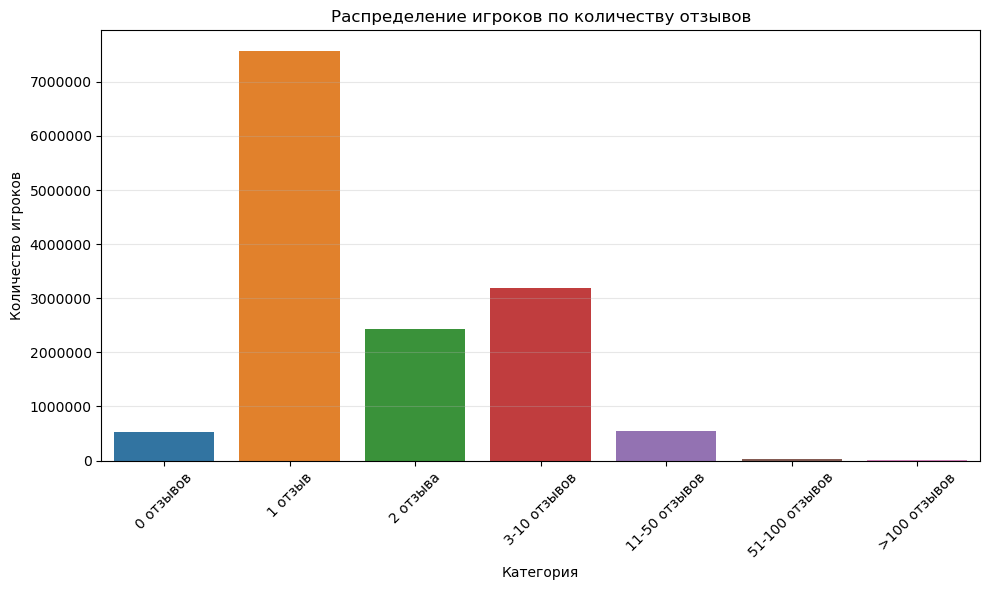

In [23]:
fig = plt.figure(figsize = (10, 7))
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Категория', y='Количество игроков', hue='Категория')
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.3)
plt.title('Распределение игроков по количеству отзывов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Датасет рекоммендаций

In [3]:
rec_data = pd.read_csv(path + '\\recommendations.csv')
rec_data.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [4]:
rec_data.shape

(41154794, 8)

In [5]:
rec_data.describe()

,app_id,helpful,funny,hours,user_id,review_id
count,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07
mean,6.032724e+05,3.202567e+00,1.058071e+00,1.006022e+02,7.450576e+06,2.057740e+07
std,4.729233e+05,4.693649e+01,2.867060e+01,1.761675e+02,4.010685e+06,1.188037e+07
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.539400e+05,0.000000e+00,0.000000e+00,7.800000e+00,4.287256e+06,1.028870e+07
50%,4.351500e+05,0.000000e+00,0.000000e+00,2.730000e+01,7.546446e+06,2.057740e+07
75%,9.331100e+05,0.000000e+00,0.000000e+00,9.920000e+01,1.096877e+07,3.086609e+07
max,2.253290e+06,3.621200e+04,2.810900e+04,1.000000e+03,1.430606e+07,4.115479e+07


In [6]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB


In [9]:
rec_data.isna().sum() # проверка на пропуски

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [8]:
duplicates = rec_data.duplicated() # проверка на дубликаты
duplicates.sum()

0

In [12]:
unique_appId = rec_data['app_id'].nunique()
print(f'Кол-во уникальных id игр: {unique_appId}')

Кол-во уникальных id игр: 37610


In [13]:
unique_userId = rec_data['user_id'].nunique()
print(f'Кол-во уникальных id пользователей: {unique_userId}')

Кол-во уникальных id пользователей: 13781059


In [4]:
recommend = rec_data['is_recommended'].sum()
no_recommend = rec_data.shape[0] - recommend
recommend, no_recommend

(35304398, 5850396)

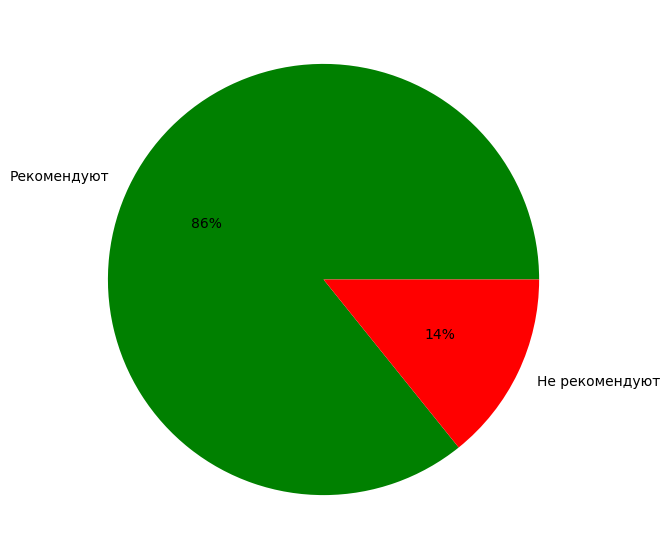

In [7]:
fig = plt.figure(figsize=(10, 7))
data = [recommend, no_recommend]
labels = ['Рекомендуют', 'Не рекомендуют']

colors = ['green', 'red']

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

In [7]:
# разбиение по часам

less_one_hour = len(rec_data[rec_data['hours'] < 1])
one_two_hours = len(rec_data[(rec_data['hours'] >= 1) & (rec_data['hours'] <2)])
two_ten_hours = len(rec_data[(rec_data['hours'] >= 2) & (rec_data['hours'] <10)])
ten_fifty_hours = len(rec_data[(rec_data['hours'] >= 10) & (rec_data['hours'] < 50)])
fifty_100_hours = len(rec_data[(rec_data['hours'] >= 50) & (rec_data['hours'] < 100)])
onehundred_1000_hours = len(rec_data[(rec_data['hours'] >= 100) & (rec_data['hours'] < 1000)])
one_thousand_hours = len(rec_data[rec_data['hours'] >= 1000])

print(f'Кол-во отзывов с менее 1 наигранным часом: {(less_one_hour)}')
print(f'Кол-во отзывов с 1 до 2 наиграннами часами: {(one_two_hours)}')
print(f'Кол-во отзывов с 2 до 10 наиграннами часами: {(two_ten_hours)}')
print(f'Кол-во отзывов с 10 до 50 наиграннами часами: {(ten_fifty_hours)}')
print(f'Кол-во отзывов с 50 до 100 наиграннами часами: {(fifty_100_hours)}')
print(f'Кол-во отзывов с 100 - 1000 наигранными часами: {(onehundred_1000_hours)}')
print(f'Кол-во отзывов с более 1000 наигранным часом: {(one_thousand_hours)}')

Кол-во отзывов с менее 1 наигранным часом: 2161724
Кол-во отзывов с 1 до 2 наиграннами часами: 1634595
Кол-во отзывов с 2 до 10 наиграннами часами: 8228057
Кол-во отзывов с 10 до 50 наиграннами часами: 13681400
Кол-во отзывов с 50 до 100 наиграннами часами: 5209099
Кол-во отзывов с 100 - 1000 наигранными часами: 10239893
Кол-во отзывов с более 1000 наигранным часом: 26


In [9]:
df = pd.DataFrame({
    'Категория': ['менее 1 часа', '1-2 часа', '2-10 часов', '10-50 часов', '50-100 часов', '100-1000 часов', '>=1000 часов'],
    'Количество отзывов': [
        (less_one_hour),
        (one_two_hours), 
        (two_ten_hours),
        (ten_fifty_hours),
        (fifty_100_hours),
        (onehundred_1000_hours),
        (one_thousand_hours)
    ]
})
df

,Категория,Количество отзывов
0,менее 1 часа,2161724
1,1-2 часа,1634595
2,2-10 часов,8228057
3,10-50 часов,13681400
4,50-100 часов,5209099
5,100-1000 часов,10239893
6,>=1000 часов,26


<Figure size 1000x700 with 0 Axes>

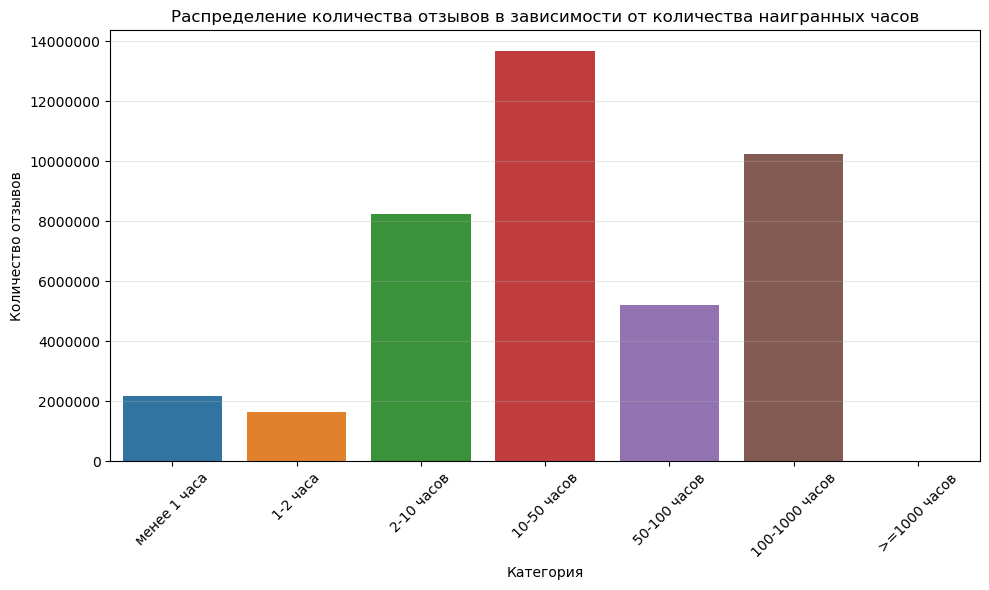

In [10]:
fig = plt.figure(figsize = (10, 7))
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Категория', y='Количество отзывов', hue='Категория')
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.3)
plt.title('Распределение количества отзывов в зависимости от количества наигранных часов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Корреляция наигранных часов с кол-вом положительных и отрицательных отзывов

In [11]:
bins = [0, 1, 2, 10, 50, 100, 1000, float('inf')]
labels = [
    'менее 1 часа',
    '1–2 часа',
    '2–10 часов',
    '10–50 часов',
    '50–100 часов',
    '100–1000 часов',
    '≥1000 часов'
]

new_rec_data = rec_data.copy()
new_rec_data['hours_group'] = pd.cut(
    rec_data['hours'],
    bins=bins,
    labels=labels,
    right=False
)

new_rec_data.head()


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_group
0,975370,0,0,2022-12-12,True,36.3,51580,0,10–50 часов
1,304390,4,0,2017-02-17,False,11.5,2586,1,10–50 часов
2,1085660,2,0,2019-11-17,True,336.5,253880,2,100–1000 часов
3,703080,0,0,2022-09-23,True,27.4,259432,3,10–50 часов
4,526870,0,0,2021-01-10,True,7.9,23869,4,2–10 часов


In [12]:
grouped = (
    new_rec_data
    .groupby(['hours_group', 'is_recommended'])
    .size()
    .reset_index(name='count')
)

grouped

C:\Users\User\AppData\Local\Temp\ipykernel_33384\3593573183.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['hours_group', 'is_recommended'])


,hours_group,is_recommended,count
0,менее 1 часа,False,922563
1,менее 1 часа,True,1239161
2,1–2 часа,False,508413
3,1–2 часа,True,1126182
4,2–10 часов,False,1385095
5,2–10 часов,True,6842962
6,10–50 часов,False,1425869
7,10–50 часов,True,12255531
8,50–100 часов,False,496066
9,50–100 часов,True,4713033


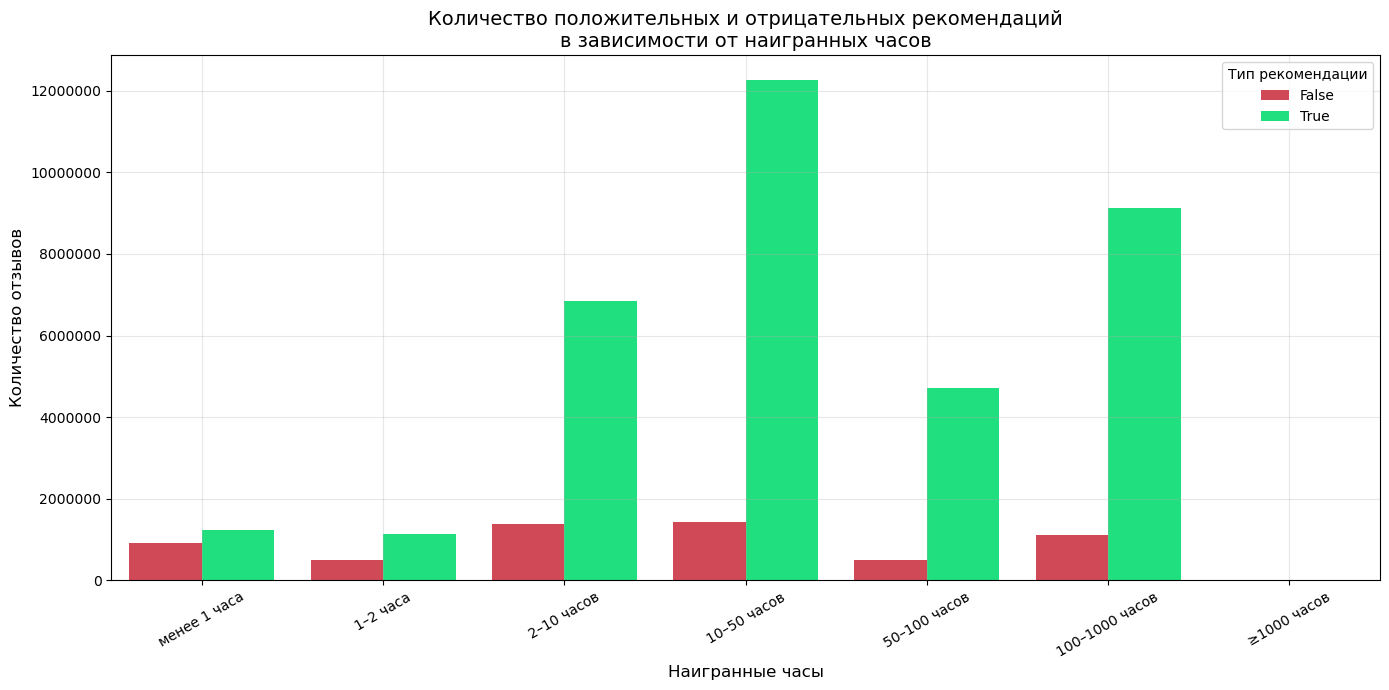

In [22]:
plt.figure(figsize=(14, 7))

sns.barplot(
    data=grouped,
    x='hours_group',
    y='count',
    hue='is_recommended',
    palette=['#e63244', '#00ff7f'],
    
)

plt.title('Количество положительных и отрицательных рекомендаций\nв зависимости от наигранных часов', fontsize=14)
plt.xlabel('Наигранные часы', fontsize=12)
plt.ylabel('Количество отзывов', fontsize=12)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=30)
plt.legend(title='Тип рекомендации')
plt.tight_layout()
plt.grid(alpha = 0.3)

plt.show()


### Корреляция кол-ва helpful и funny оценок с типом отзыва

#### helpful

In [23]:
bins = [2, 5, 10, 20, 100, float('inf')]
labels = ['2–5', '5–10', '10–20', '20–100', '100+']


In [24]:
helpful_df = rec_data[rec_data['helpful'] >= 2].copy()

In [25]:
helpful_df['helpful_group'] = pd.cut(
    helpful_df['helpful'],
    bins=bins,
    labels=labels,
    right=False
)


In [27]:
helpful_grouped = (
    helpful_df
    .groupby(['helpful_group', 'is_recommended'])
    .size()
    .reset_index(name='count')
)
helpful_grouped

C:\Users\User\AppData\Local\Temp\ipykernel_33384\1944857543.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['helpful_group', 'is_recommended'])


,helpful_group,is_recommended,count
0,2–5,False,1342339
1,2–5,True,3930010
2,5–10,False,533807
3,5–10,True,1066784
4,10–20,False,250411
5,10–20,True,591433
6,20–100,False,195111
7,20–100,True,587404
8,100+,False,52632
9,100+,True,143384


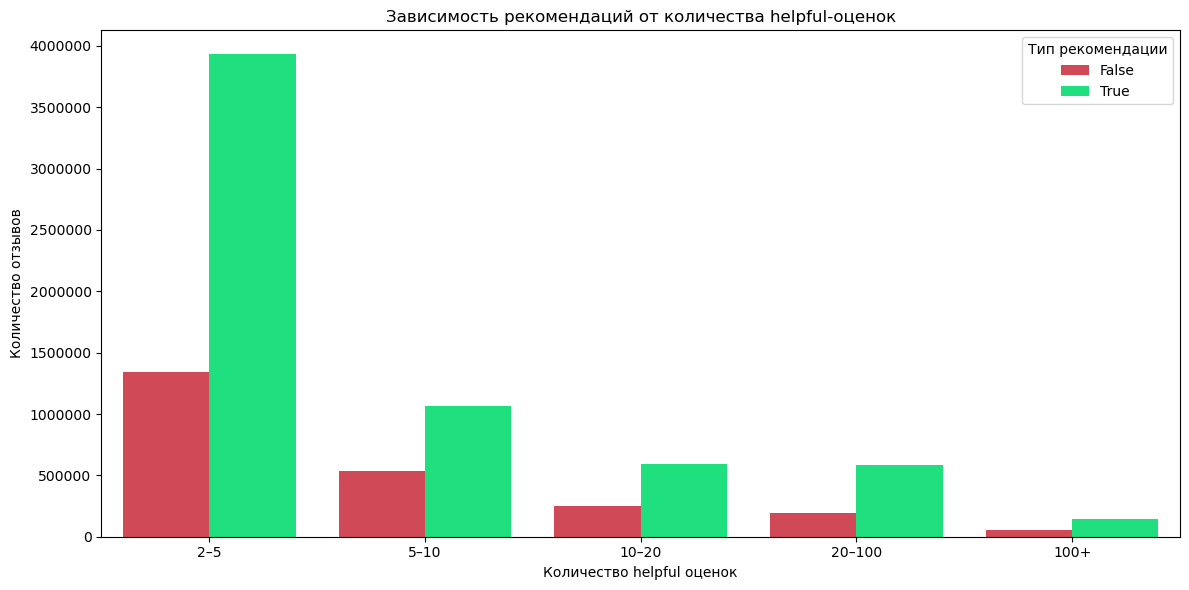

In [31]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=helpful_grouped,
    x='helpful_group',
    y='count',
    hue='is_recommended',
    palette=['#e63244', '#00ff7f'],

)

plt.title('Зависимость рекомендаций от количества helpful-оценок')
plt.xlabel('Количество helpful оценок')
plt.ylabel('Количество отзывов')
plt.legend(title='Тип рекомендации')
plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()
plt.show()


#### funny

In [32]:
funny_df = rec_data[rec_data['funny'] >= 2].copy()


In [33]:
funny_df['funny_group'] = pd.cut(
    funny_df['funny'],
    bins=bins,
    labels=labels,
    right=False
)

In [34]:
funny_grouped = (
    funny_df
    .groupby(['funny_group', 'is_recommended'])
    .size()
    .reset_index(name='count')
)

C:\Users\User\AppData\Local\Temp\ipykernel_33384\3705890909.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['funny_group', 'is_recommended'])


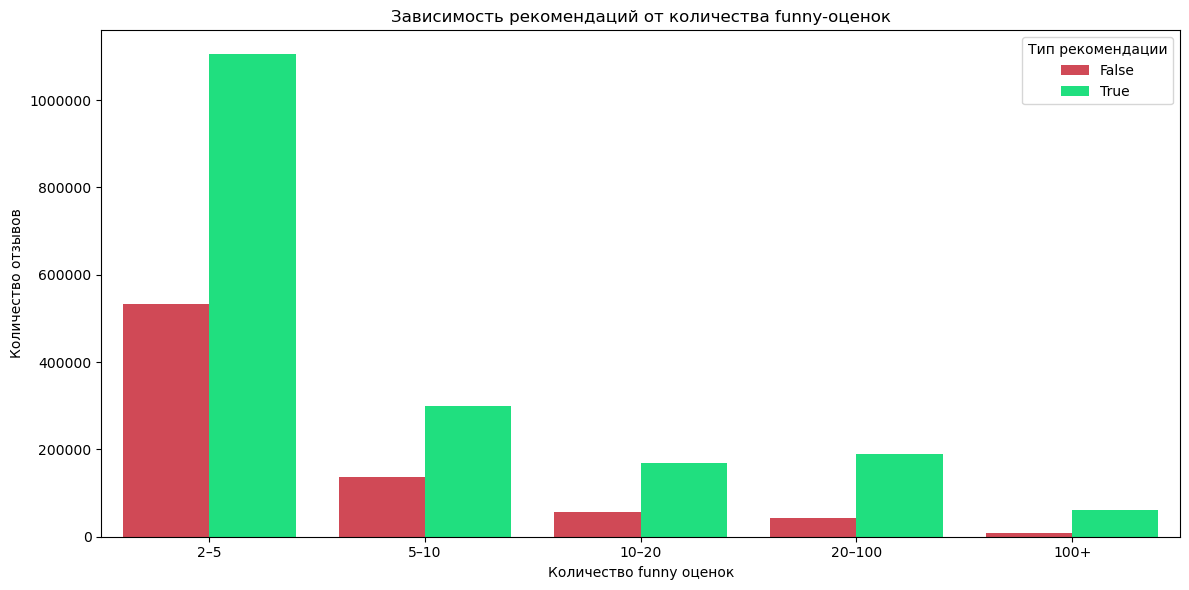

In [36]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=funny_grouped,
    x='funny_group',
    y='count',
    hue='is_recommended',
    palette=['#e63244', '#00ff7f'],
)

plt.title('Зависимость рекомендаций от количества funny-оценок')
plt.xlabel('Количество funny оценок')
plt.ylabel('Количество отзывов')
plt.legend(title='Тип рекомендации')
plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()
plt.show()


## Метаданные игр

In [38]:
games_metadata = pd.read_json(
    path + '\\games_metadata.json',
    lines=True
)

games_metadata.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [39]:
games_metadata.shape

(50872, 3)

In [40]:
games_metadata.describe()

,app_id
count,5.087200e+04
mean,1.055224e+06
std,6.103249e+05
min,1.000000e+01
25%,5.287375e+05
50%,9.860850e+05
75%,1.524895e+06
max,2.599300e+06


In [41]:
games_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [42]:
games_metadata.isna().sum() # Проверка на пустые значения

app_id         0
description    0
tags           0
dtype: int64

In [48]:
duplicates = games_metadata.duplicated(subset=['app_id', 'description']) # Поиск дубликатов
duplicates.sum()

0

In [51]:
zero_description_games = games_metadata[games_metadata['description'] == '']
print(f"Кол-во игр без описания: {len(zero_description_games)}")

Кол-во игр без описания: 10373


### Топ 20 тегов
Брал все тэги из метаданных игр, т.к в Steam теги формируются пользователями и первый тег не всегда является основным жанром

In [52]:
tags_exploded = games_metadata[['app_id', 'tags']].explode('tags')


In [56]:
tag_counts = (
    tags_exploded
    .groupby('tags')['app_id']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='count')
)


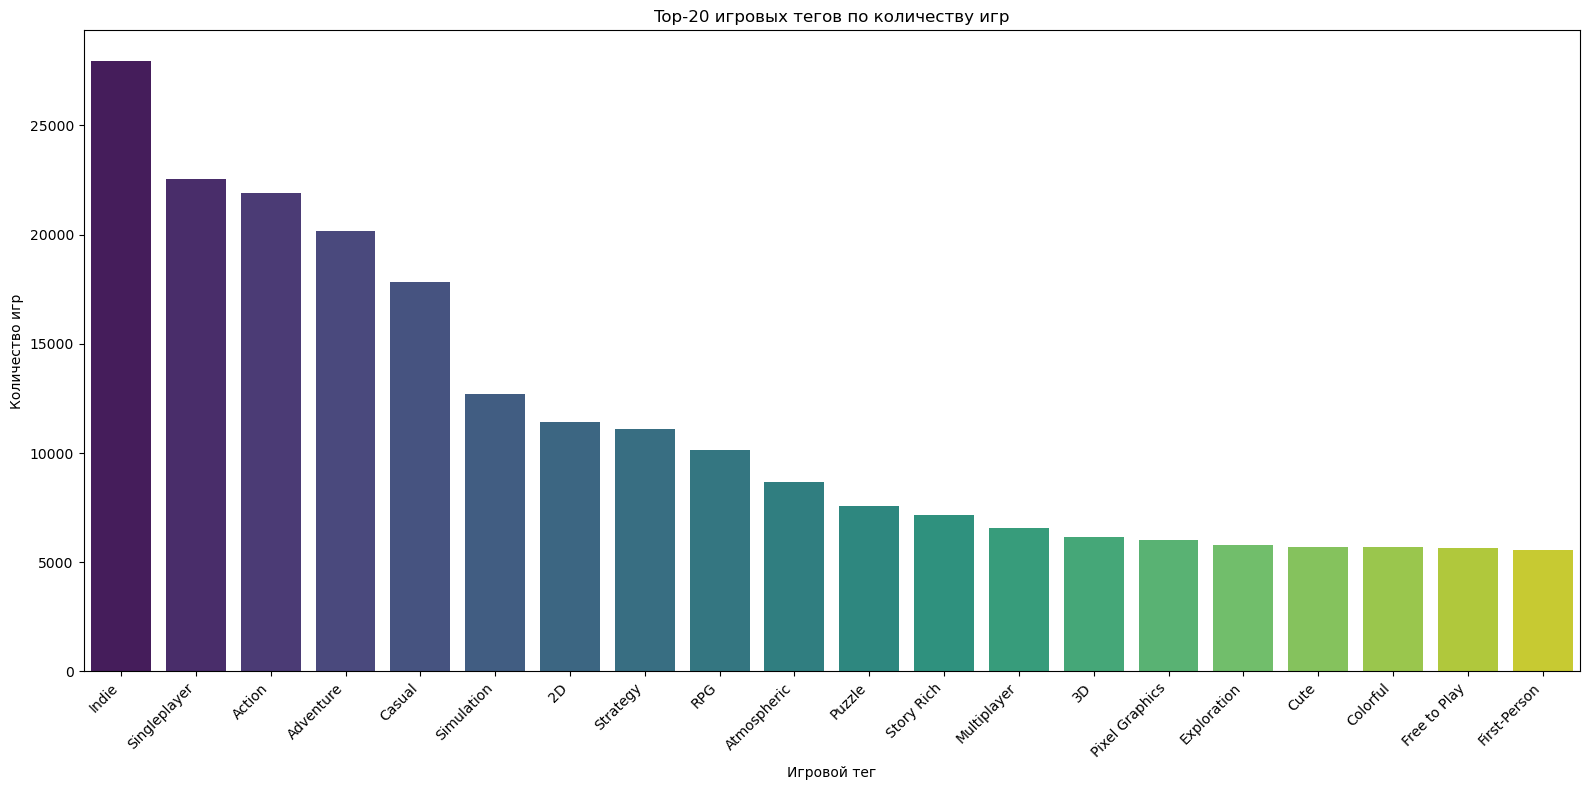

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

sns.barplot(
    data=tag_counts,
    x='tags',
    y='count',
    palette='viridis',
    hue = 'tags',
    legend=False
)

plt.title('Top-20 игровых тегов по количеству игр')
plt.xlabel('Игровой тег')
plt.ylabel('Количество игр')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
